In [1]:

%matplotlib inline
import pandas as pd
import itertools

import shutil
from matplotlib import pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import sys
import os

datatypelist=[]
f1="/Users/irffanalahi/Research/Research_update/Dataqc/BCR/cs_stsranderror_result/run_bilge_code/wb_cfd_ONLYcfD_FASTQ_s10_readnum10000000_BCR_v1_combined.txt"
df1=pd.read_csv(f1,sep="\t")
tmpdata='New healthy'
df1['data']=tmpdata
datatypelist.append(tmpdata)

f2="/Users/irffanalahi/Research/Research_update/Dataqc/BCR/cs_stsranderror_result/run_bilge_code/tothealthyFASTQ_s10_readnum10000000_BCR_combined.txt"
df2=pd.read_csv(f2,sep="\t")
tmpdata='Previous healthy'
df2['data']=tmpdata
datatypelist.append(tmpdata)

f3="/Users/irffanalahi/Research/Research_update/Dataqc/BCR/cs_stsranderror_result/run_bilge_code/medCRCFASTQ_s10_readnum10000000_BCR_csstranderror_combined_good4.txt"
df3=pd.read_csv(f3,sep="\t")
tmpdata='CRC'
df3['data']=tmpdata
datatypelist.append(tmpdata)


outputfile=f3

dflist=[df1,df2,df3] ###########

#valuevars=['CD4','CD8','NK','nB','cB','PC','Mn','M0','M1','M2','iDC','mDC','mNeu']
#valuevars=['d50th_ptle','50th_ptle','total','secondary','supplementary','duplicates','mapped','mapped_percent','paired_in_sequencing','read1','read2','properly_paired','properly_paired_percentage','with_itself_and_mate_mapped','singletons','with_mate_mapped_to_a_different_chr','with_mate_mapped_to_a_different_chr_mapQ>=5']



valuevars=['rc1','rc1_stdev','rc2','rc2_stdev','rc3','rc3_stdev','1 - rc1','1-rc1_stdev','1 - rc2','1-rc2_stdev','1 - rc3','1-rc3_stdev','1 - mean(rc)','1-mean(rc)_stdev','BCR']
#valuevars=['Plasma vol. (ml)','cfDNA con. QUBIT (ng/ul)','Total cfDNA amount (ng)','cfDNA amount/ml plasma (ng/ml)','cfDNA used for Lib prep (ng)','cfDNA (ng) for BS conversion','BA percentage  70bp-450bp','0.5% Lambda DNA spike-in (ng)','Indexing PCR cycles','Final Lib. Conc. (ng/ul)','Elution vol. (ul)','Total amount of Lib (ng)','Library Avg. Fragment size (Bioanalyzer)','nM of Library/ul']


len(valuevars)

15

In [2]:

alldf = pd.concat(dflist)
alldf.head()

,file,rc1,rc1_stdev,rc2,rc2_stdev,rc3,rc3_stdev,1 - rc1,1-rc1_stdev,1 - rc2,1-rc2_stdev,1 - rc3,1-rc3_stdev,1 - mean(rc),1-mean(rc)_stdev,BCR,data
0,readnum10000000/NU-05-cfDNA,0.03655,0.013789,0.03560,0.012445,0.03645,0.011243,0.96345,0.013789,0.96440,0.012445,0.96355,0.011243,0.963800,0.012492,0.963800,New healthy
1,readnum10000000/NU-14-cfDNA,0.01455,0.011667,0.01290,0.010748,0.01300,0.013859,0.98545,0.011667,0.98710,0.010748,0.98700,0.013859,0.986517,0.012092,0.986517,New healthy
2,readnum10000000/NU-20-cfDNA,0.00605,0.002333,0.00245,0.001909,0.00570,0.001273,0.99395,0.002333,0.99755,0.001909,0.99430,0.001273,0.995267,0.000990,0.995267,New healthy
3,readnum10000000/NU-24-cfDNA,0.00255,0.000212,0.00380,0.000424,0.00765,0.000778,0.99745,0.000212,0.99620,0.000424,0.99235,0.000778,0.995333,0.000471,0.995333,New healthy
4,readnum10000000/NU-31-cfDNA,0.00345,0.002758,0.01175,0.004172,0.00495,0.001344,0.99655,0.002758,0.98825,0.004172,0.99505,0.001344,0.993283,0.001862,0.993283,New healthy


In [3]:
mdf = pd.melt(alldf, id_vars=['data'], value_vars=valuevars)

In [4]:
def combine_box_pairs(samples, cell_types):
    box_pairs = []
    for cell in cell_types:
        pairs = []
        for sample in samples:
            pairs.append((cell, sample))
        for i in range(len(samples)):
            try:
                box_pairs.append((pairs[i], pairs[i + 1]))
            except IndexError:
                box_pairs.append((pairs[i], pairs[0]))
    return box_pairs

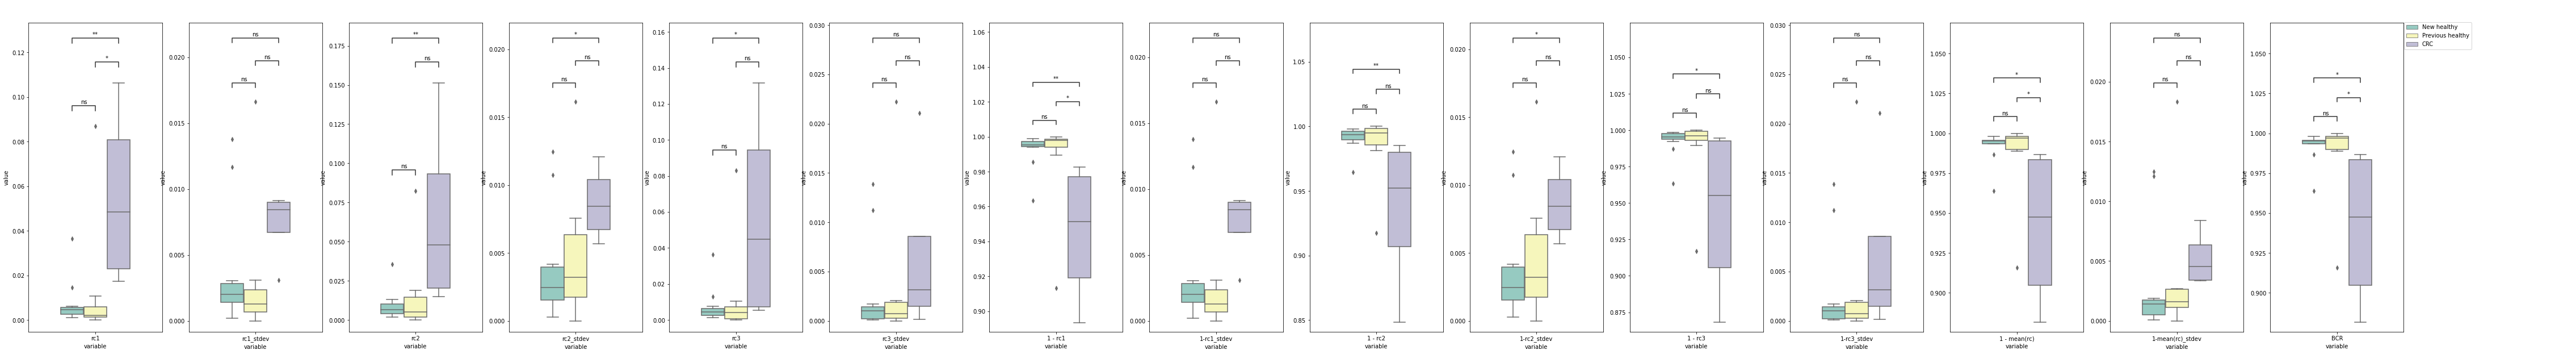

In [5]:
fig, axs = plt.subplots(1, len(valuevars), figsize=(len(valuevars)*5, 10))

if not os.path.exists('p_vals'):
    os.makedirs('p_vals')
else:
    print("p_vals dir exist. Exiting")
    sys.exit(1)


for i in range(len(valuevars)):
    axs[i] = sns.boxplot(x="variable", y="value", hue="data", data=mdf[mdf['variable'] == valuevars[i]],palette="Set3", ax = axs[i])
    axs[i].legend([],[], frameon=False)
    Box_pairs=combine_box_pairs(datatypelist, [valuevars[i]])
    original_stdout = sys.stdout

    with open('p_vals/p_vals' + str(i) + '.txt', 'w') as f:
        sys.stdout = f # Change the standard output to the file we created.
        test_results = add_stat_annotation(axs[i],data=mdf[mdf['variable'] == valuevars[i]], x="variable", y="value", hue="data",box_pairs=Box_pairs,
                                   test='Mann-Whitney', text_format='star', comparisons_correction=None)
        sys.stdout = original_stdout # Reset the standard output to its original value
        f.close()

lines, labels = axs[0].get_legend_handles_labels()
fig.legend(lines, labels, loc=(0.933, 0.86))
plt.show()

fig.savefig(outputfile+"_all.pdf",dpi=300, bbox_inches='tight')


In [6]:
sig_comparison = []

for i in range(len(valuevars)):
    file_out = open('p_vals/p_vals' + str(i) + '.txt', 'r')
    Lines = file_out.readlines()
    file_out.close()

    sig_list = []

    for line in Lines:
        if 'P_val' in line:
            split = line.split(' ')
            for name in split:
                if 'P_val' in name:
                    res = name.split('=')
                    if float(res[1]) < 0.05:
                        new_line = line.split('_')
                        cell = new_line[0]
                        val1 = new_line[1].split(' v.s.')[0]
                        val2 = new_line[2].split(':')[0]
                        sig_list.append(((cell, val1), (cell, val2)))
    sig_comparison.append(sig_list)
    
print(sig_comparison)

[[(('rc1', 'Previous healthy'), ('rc1', 'CRC')), (('rc1', 'New healthy'), ('rc1', 'CRC'))], [], [(('rc2', 'New healthy'), ('rc2', 'CRC'))], [(('rc2', 'stdev'), ('rc2', 'New healthy v.s. rc2'))], [(('rc3', 'New healthy'), ('rc3', 'CRC'))], [], [(('1 - rc1', 'Previous healthy'), ('1 - rc1', 'CRC')), (('1 - rc1', 'New healthy'), ('1 - rc1', 'CRC'))], [], [(('1 - rc2', 'New healthy'), ('1 - rc2', 'CRC'))], [(('1-rc2', 'stdev'), ('1-rc2', 'New healthy v.s. 1-rc2'))], [(('1 - rc3', 'New healthy'), ('1 - rc3', 'CRC'))], [], [(('1 - mean(rc)', 'Previous healthy'), ('1 - mean(rc)', 'CRC')), (('1 - mean(rc)', 'New healthy'), ('1 - mean(rc)', 'CRC'))], [], [(('BCR', 'Previous healthy'), ('BCR', 'CRC')), (('BCR', 'New healthy'), ('BCR', 'CRC'))]]


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

rc1_Previous healthy v.s. rc1_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=3.375e-02 U_stat=3.000e+00
rc1_New healthy v.s. rc1_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=9.127e-03 U_stat=2.000e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

rc2_New healthy v.s. rc2_CRC: Mann-Whitney-Wilcoxon test two-sided, P_val=9.127e-03 U_stat=2.000e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



ValueError: box_pairs contains an invalid box pair.

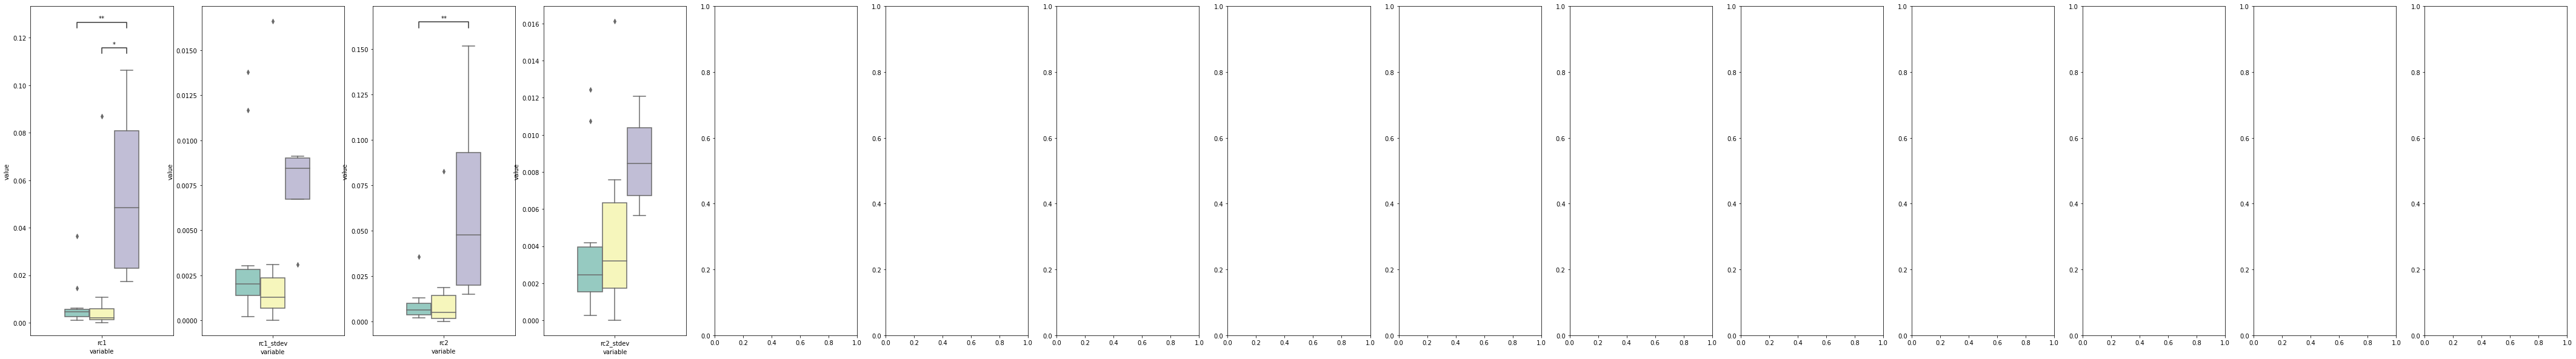

In [7]:
fig, axs = plt.subplots(1, len(valuevars), figsize=(len(valuevars)*5, 10))

for i in range(len(valuevars)):
    axs[i] = sns.boxplot(x="variable", y="value", hue="data", data=mdf[mdf['variable'] == valuevars[i]],palette="Set3", ax = axs[i])
    axs[i].legend([],[], frameon=False)
    Box_pairs=sig_comparison[i]
    if len(Box_pairs) != 0:
        test_results = add_stat_annotation(axs[i],data=mdf[mdf['variable'] == valuevars[i]], x="variable", y="value", hue="data",box_pairs=Box_pairs,
                                    test='Mann-Whitney', text_format='star', comparisons_correction=None)

lines, labels = axs[0].get_legend_handles_labels()
fig.legend(lines, labels, loc=(0.933, 0.86))
plt.show()

fig.savefig(outputfile+"_significant.pdf",dpi=300, bbox_inches='tight')


In [ ]:
shutil.rmtree('p_vals')